# Statistical Parity Difference
Statistical Parity Difference measures the difference in positive outcome rates between privileged and unprivileged groups in AI decision-making. 
A value of 0 indicates fairness, meaning both groups receive favorable outcomes at the same rate.

Below is a table to interpret the results:

| SPD Value     | Interpretation                                    | Group Benefiting                      |
| ------------  | --------                                          | --------                              |
| 0             | Perfect fairness (equal treatment for both groups)| Neither (equal outcomes)               |
| 0.01 to 0.1   | Minimal disparity (slight bias)                   | Privileged group benefits slightly     |
| -0.01 to -0.1 | Minimal disparity (slight bias)                   | Unprivileged group benefits slightly   |
| 0.1 to 0.2    | Moderate disparity (potential bias)               | Privileged group benefits              |
|  -0.1 to -0.2 | Moderate disparity (potential bias)               | Unprivileged group benefits            |
| > 0.2         | Significant disparity (likely bias)               | Privileged group benefits strongly     |
| < -0.2        | Significant disparity (likely bias)               | Unprivileged group benefits strongly   |

In [1]:
import sys
import os

# Aggiunge la directory principale del progetto al PYTHONPATH
sys.path.append(os.path.abspath(os.path.join('..')))

In [2]:
import fairlib as fl
import matplotlib.pyplot as plt

INFO:fairlib:fairlib loaded


## Import or dataset creation.
To use metrics, simply use an “enhanced” DataFrame (pandas library). It is possible to create it from the library.
This DataFrame is completely identical to a standard one with some extra functionality.

In [3]:
df = fl.DataFrame({
    "name":     ["Alice", "Bob", "Carla", "Davide", "Elena", "Francesco", "Giorgia", "Hanna", "Luca", "Maria"],
    "age":      [25, 32, 45, 29, 34, 38, 27, 50, 31, 44],
    "sex":      ["F", "M", "F", "M", "F", "M", "F", "F", "M", "F"],
    "income":   [40000, 38000, 43400, 43000, 48000, 49000, 42000, 41000, 47000, 40000]
})

We go on to define which columns we consider sensitive and the “target” column then the one we would like to predict

In [4]:
df.sensitive = {"age", "sex"}
df.targets = {"income"}

In order to invoke the SPD on our dataset we need to do some preprocessing, so let's go and change the column values based on binary values.

In [5]:
privileged = {
    "age": lambda x: x < 38,
    "sex": lambda x: x == "M",
}
for column, rule in privileged.items():
    df[column] = df[column].apply(rule).astype(int)
    

targets = {
    "income": lambda x: x > 45000
}   
for column, rule in targets.items():
    df[column] = df[column].apply(rule).astype(int)


Once this is done we can call the statistical parity difference directly on the dataframe.

In [6]:
spd = df.statistical_parity_difference()

print(spd)

{(income=1, sex=1): 0.33333333333333337, (income=1, age=1): 0.08333333333333331}


/Users/gciatto/Work/Students/master-thesis-dizio-ay2324/fairlib/metrics/_utils.py:25: UserWarning: Sensitive column has less than 2 unique values: 1
  warnings.warn(


## Interpretation of the results

As we can see there is a clear disparity for gender.
And a slight disparity for age.

This means that female subjects in the previous dataset are much less likely to have an income higher than 45000

In [7]:
labels = list(spd[{'income': 1}].keys())
values = list(spd[{'income': 1}].values())

In [8]:
labels = [f"{item1}, {item2}" for item1, item2 in labels]

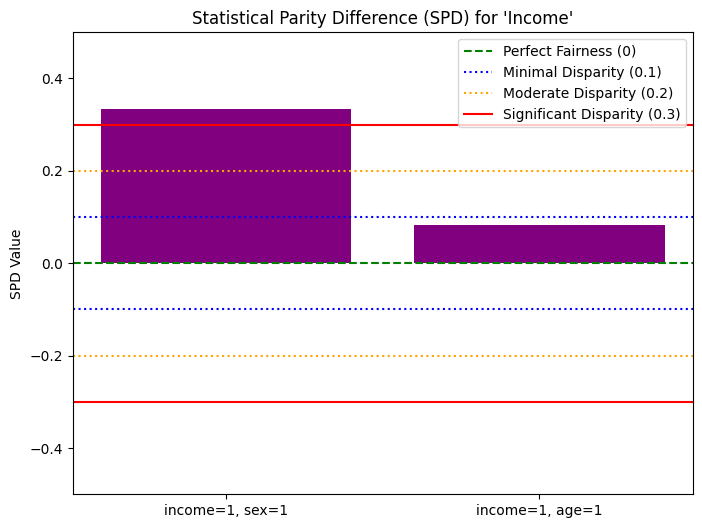

In [9]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.axhline(y=0, color='green', linestyle='--', label="Perfect Fairness (0)")

ax.axhline(y=0.1, color='blue', linestyle=':', label="Minimal Disparity (0.1)")
ax.axhline(y=-0.1, color='blue', linestyle=':')
ax.axhline(y=0.2, color='orange', linestyle=':', label="Moderate Disparity (0.2)")
ax.axhline(y=-0.2, color='orange', linestyle=':')
ax.axhline(y=0.3, color='red', linestyle='-', label="Significant Disparity (0.3)")
ax.axhline(y=-0.3, color='red', linestyle='-')

ax.bar(labels, values, color=['purple', 'purple'])


ax.set_title("Statistical Parity Difference (SPD) for 'Income'")
ax.set_ylabel("SPD Value")
ax.set_xticks(labels)
ax.set_ylim([-0.5, 0.5])

ax.legend()

plt.show()